### [Data Science Term Project - Golden_Time_Finding_The_Underprivileged]
Github :
https://github.com/RyuKwanKon/Golden_Time_Finding_The_Underprivileged</br>
DataSet :  https://drive.google.com/uc?id=1ez0tNCX49Cxjzt6Ir4jkxy7Z9TnzOV60</br>
* Resource issues restrict dataset to Seongnam City

Reference:  https://data.gg.go.kr/portal/data/service/selectServicePage.do?infId=SE00GA6F273B8PIJ9N8412495661&infSeq=1


Team member
* 201935039 Ryu KwanKon
* 201935013 Kim Daehun
* 201935028 Kim Jongmin



In [ ]:
url = "https://drive.google.com/file/d/1ez0tNCX49Cxjzt6Ir4jkxy7Z9TnzOV60/view?usp=drive_link"
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
print("▶ 공유파일 다운로드 경로명 : ", path)

▶ 공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=1ez0tNCX49Cxjzt6Ir4jkxy7Z9TnzOV60


### [Objective]


---


To find the marginalized area within the golden time and propose the fact through a government agency or contest.<br/>
Golden Time is directly related to human life, and in Korea, there is no data in specific regions for this fact, so I thought it was a meaningful topic.

### [Data curation And Load Dataset]

---

Low(sample) X Column(feature) = 35626 X 33<br/>

Target: [현장도착년월일, 현장도착시각] <br/>

Categorical feature
> 시군명, 출동소방서, 출동안전센터, 접수경로, 관할구분, 환자성별, 긴급구조시, 긴급구조구, 긴급구조동, 긴급구조리, 외국인여부, 국적, 구급처종명, 환자증상1, 환자증상2, 질병외_교통사고, 질병외_사고부상, 질병외_비외상성손상, 의식상태, 구급대원1_자격, 구급대원2_자격, 운전요원_자격
<br/>

Numerical feature
> 집계년도, 현장과의거리, 환자연령
<br/>

DateType feature
> 출동년월일, 출동시각, 현장도착년월일, 현장도착시각, 귀소년월일, 귀소시각
<br/>

Outlier Data
* It is judged that the outlier data is the abnormally large difference between the reporting time and the arrival time.
* It is judged that there was an exception to the data with an arrival time of more than 60 minutes.

> EX) Invalid input<br/>
* 현장도착시각       /    신고시각     /      Time of arrival<br/>
* 2022-02-14 18:28:00 / 2022-02-13 18:04:00 / 1464.0
* 2022-05-12 23:30:00 / 2022-05-11 23:18:00 / 1452.0

> EX)<br/>
* 현장도착시각       /    신고시각     /      Time of arrival<br/>
* 2022-01-26 08:55:00 / 2022-01-26 06:27:00 / 148.0
* 2022-02-09 10:46:00 / 2022-02-09 08:59:00 / 107.0



<br/>
Nan Data

*   현장도착년월일        6675
*   현장도착시각         6675
*   귀소년월일             1
*   귀소시각              1
*   환자연령           8719
*   환자성별           8508
*   국적            35004
*   구급처종명          4475
*   환자증상1         10838
*   환자증상2         20344
*   질병외_교통사고      33900
*   질병외_사고부상      30700
*   질병외_비외상성손상    34994
*   의식상태           9303
*   구급대원1_자격      17737
*   구급대원2_자격         94
*   운전요원_자격          16







In [12]:
import numpy as np
import pandas as pd

# Data Load
df = pd.read_csv('/content/구급활동현황.csv', encoding='cp949', na_values=np.nan)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35626 entries, 0 to 35625
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   집계년도        35626 non-null  int64  
 1   시군명         35626 non-null  object 
 2   출동소방서       35626 non-null  object 
 3   출동안전센터      35626 non-null  object 
 4   신고년월일       35626 non-null  object 
 5   신고시각        35626 non-null  object 
 6   접수경로        35626 non-null  object 
 7   관할구분        35626 non-null  object 
 8   출동년월일       35626 non-null  object 
 9   출동시각        35626 non-null  object 
 10  현장도착년월일     28951 non-null  object 
 11  현장도착시각      28951 non-null  object 
 12  현장과의거리      35626 non-null  float64
 13  귀소년월일       35625 non-null  object 
 14  귀소시각        35625 non-null  object 
 15  환자연령        26907 non-null  float64
 16  환자성별        27118 non-null  object 
 17  긴급구조시       35626 non-null  object 
 18  긴급구조구       35626 non-null  object 
 19  긴급구조동       35626 non-nul

In [14]:
df.head()

,집계년도,시군명,출동소방서,출동안전센터,신고년월일,신고시각,접수경로,관할구분,출동년월일,출동시각,...,구급처종명,환자증상1,환자증상2,질병외_교통사고,질병외_사고부상,질병외_비외상성손상,의식상태,구급대원1_자격,구급대원2_자격,운전요원_자격
0,2022,성남시,성남소방서,태평119안전센터,2022-01-01,23:42,휴대전화,센터,2022-01-01,23:45,...,집,고열,NaN,NaN,NaN,NaN,A(Alert),응급구조사(1급),응급구조사(1급),간호사
1,2022,성남시,성남소방서,상대원119안전센터,2022-01-01,0:44,휴대전화,센터,2022-01-01,0:47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,응급구조사(1급),응급구조사(1급),간호사
2,2022,성남시,성남소방서,상대원119안전센터,2022-01-01,4:51,기타,센터,2022-01-01,4:52,...,상업시설,복통,구토,NaN,NaN,NaN,A(Alert),NaN,간호사,간호사
3,2022,성남시,성남소방서,상대원119안전센터,2022-01-01,9:40,휴대전화,센터,2022-01-01,9:41,...,기타(요양원),NaN,NaN,NaN,NaN,NaN,NaN,NaN,간호사,간호사
4,2022,성남시,성남소방서,상대원119안전센터,2022-01-01,13:36,휴대전화,센터,2022-01-01,13:40,...,집단거주시설,심정지,호흡정지,NaN,NaN,NaN,U(Coma),응급구조사(1급),응급구조사(1급),간호사


In [15]:
df.describe()

,집계년도,현장과의거리,환자연령
count,35626.0,35626.000000,26907.000000
mean,2022.0,2.434702,55.852492
std,0.0,4.520109,22.836608
min,2022.0,0.000000,0.000000
25%,2022.0,1.000000,41.000000
50%,2022.0,1.600000,60.000000
75%,2022.0,3.000000,74.000000
max,2022.0,700.000000,106.000000


In [16]:
df.isna().sum()

집계년도              0
시군명               0
출동소방서             0
출동안전센터            0
신고년월일             0
신고시각              0
접수경로              0
관할구분              0
출동년월일             0
출동시각              0
현장도착년월일        6675
현장도착시각         6675
현장과의거리            0
귀소년월일             1
귀소시각              1
환자연령           8719
환자성별           8508
긴급구조시             0
긴급구조구             0
긴급구조동             0
긴급구조리             0
외국인여부             0
국적            35004
구급처종명          4475
환자증상1         10838
환자증상2         20344
질병외_교통사고      33900
질병외_사고부상      30700
질병외_비외상성손상    34994
의식상태           9303
구급대원1_자격      17737
구급대원2_자격         94
운전요원_자격          16
dtype: int64

### Check Outlier Data

------------------------ ['Time of arrival'] > 400 ---------------------------
                   현장도착시각                신고시각  Time of arrival
3784  2022-02-14 18:28:00 2022-02-13 18:04:00           1464.0
12338 2022-05-12 23:30:00 2022-05-11 23:18:00           1452.0
------------------------ ['Time of arrival'] > 60 ---------------------------
                   현장도착시각                신고시각  Time of arrival
634   2022-01-07 23:25:00 2022-01-07 20:49:00            156.0
1152  2022-01-13 15:02:00 2022-01-13 13:56:00             66.0
2241  2022-01-26 08:55:00 2022-01-26 06:27:00            148.0
3462  2022-02-09 10:46:00 2022-02-09 08:59:00            107.0
3463  2022-02-09 10:46:00 2022-02-09 08:59:00            107.0
...                   ...                 ...              ...
32965 2022-12-05 14:51:00 2022-12-05 13:49:00             62.0
33113 2022-12-06 19:17:00 2022-12-06 18:03:00             74.0
33245 2022-12-08 09:04:00 2022-12-08 07:02:00            122.0
33386 2022-12-09 10:12:0

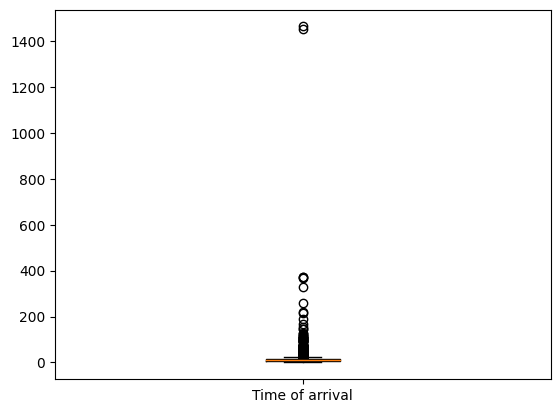

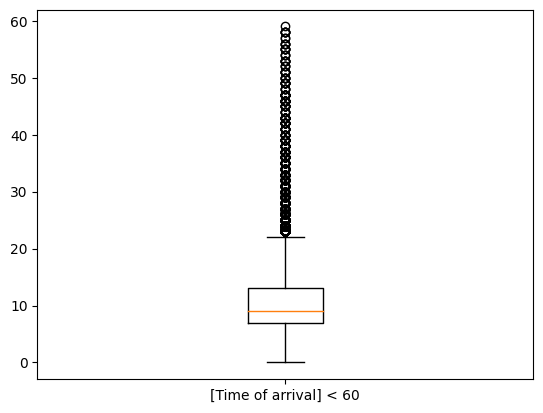

In [17]:
import matplotlib.pyplot as plt

boxPlt_df = pd.DataFrame([])
boxPlt_df['현장도착시각'] = pd.to_datetime(df['현장도착년월일'] + ' ' + df['현장도착시각'])
boxPlt_df['신고시각'] = pd.to_datetime(df['신고년월일'] + ' ' + df['신고시각'])
# Calculate Time of arrival
boxPlt_df['Time of arrival'] = boxPlt_df['현장도착시각'] - boxPlt_df['신고시각']
# Transform Minute unit
boxPlt_df['Time of arrival'] = boxPlt_df['Time of arrival'].dt.total_seconds() // 60

# print Time of arrival > 400 of DataFrame
print("------------------------ ['Time of arrival'] > 400 ---------------------------")
print(boxPlt_df[boxPlt_df['Time of arrival'] > 400])
# print Time of arrival > 60 of DataFrame
print("------------------------ ['Time of arrival'] > 60 ---------------------------")
print(boxPlt_df[boxPlt_df['Time of arrival'] > 60])
# print Boxplot of DataFrame
plt.boxplot(boxPlt_df['Time of arrival'].dropna(), labels=['Time of arrival'])
plt.show()

# print Boxplot Time of arrival < 60 of DataFrame
boxPlt_df = boxPlt_df[boxPlt_df['Time of arrival'] < 60]
plt.boxplot(boxPlt_df['Time of arrival'], labels=['[Time of arrival] < 60'])
plt.show()

### [Data Preprocessing]


---

Handle Dirty Data
1.   현장도착년월일, 현장도착시각 --> Drop Sample <br/>
  Since the corresponding data feature corresponds to the target, a sample with an empty feature cannot be used. <br/>


2.   구급처종명, 접수경로 --> Fill "기타" <br/>
  For this data, Target replaced the value of "기타" that was treated as an exception in the existing data set.


3.   긴급구조구, 긴급구조동, 긴급구조리 --> Drop Sample <br/>
  The data feature is a feature that can have a high correlation with the target value.


4.   집계년도 --> Drop column <br/>
  Since the data set is a 2022 data set, all data values for feature are the same.

5. Outlier Data --> Drop Sample

Feature Selection
* Columns with low correlation with the target value and a lot of Dirty Data were selected and removed.
*   drop_columns: [긴급구조시, 집계년도, 외국인여부, 환자연령, 환자성별, 국적, 구급대원1_자격, 구급대원2_자격, 운전요원_자격, 환자증상2, 질병외_교통사고, 질병외_사고부상, 질병외_비외상성손상, 귀소년월일, 귀소시각]
<br/>

Feature Reduction
* In order to use Category data through One-Hot Encoding, it was judged that compressing Category data with overlapping meanings was good for model efficiency.
* new_feature = 출동안전센터, columns = [시군명, 출동소방서, 출동안전센터]
* new_feature = 긴급구조지역, columns = [긴급구조구, 긴급구조동]
<br/>

Feature Creation
* To make up for the somewhat insufficient numerical data.
*   출동년월일, 현장도착년월일 --> 출동시각-년, 출동시각-월, 출동시각-일, 현장도착시각-년, 현장도착시각-월, 현장도착시각-일

*   출동시각, 현장도착시각 --> 출동시각-시간, 출동시각-분, 현장도착시각-시간, 현장도착시각-분










#### - - Preprocessing function - - 

In [18]:
# Description - Drop the selected feature.
# Parameter - DataFrame, Features
# Return - DataFrame
def drop_selected_feature(dataFrame, selected_column):
  dataFrame = dataFrame.drop(labels = drop_columns, axis = 1)
  return dataFrame

# Description - Features with similar characteristics are combined into one.
# Parameter - DataFrame, combined feature, feature to combine
# Return - DataFrame
def combine_features(dataFrame, new_feature, columns):
  temp_df = pd.DataFrame()
  for idx, column in enumerate(columns):
    # the last part of the array
    if idx == len(columns) - 1:
      temp_df[new_feature] = temp_df[new_feature] + dataFrame[column]
    elif not new_feature in temp_df.columns:
      temp_df[new_feature] = dataFrame[column] + " "
    # the second part of the array
    else:
      temp_df[new_feature] = temp_df[new_feature] + dataFrame[column] + " "
  dataFrame[new_feature] = temp_df[new_feature]
  return dataFrame

# Description - Replace dirty data with a specific value.
# Parameter - DataFrame, selected_feature, replacement value.
# Return - DataFrame.
def fill_dirty_data(dataFrame, selected_feature, value):
    dataFrame[selected_feature] = dataFrame[selected_feature].fillna(value)
    dataFrame.loc[dataFrame[selected_feature].str.contains(value), selected_feature] = value
    return dataFrame

# Description - Change the feature type to the desired form.
# Parameter - DataFrame, selected_feature, replacement type.
# Return - DataFrame.
def change_type(dataFrame, columns, type):
  for column in columns:
    dataFrame[column] = dataFrame[column].astype(type)
  return dataFrame

# Description - change (hour:minutes) into minutes.
# Parameter - Sample.
# Return - Minute.
def multiply_time(row):
    if pd.isna(row):
        return np.nan
    time_parts = row.split(':')
    hour = int(time_parts[0])
    minute = int(time_parts[1])
    return (hour * 60) + minute

# Description - Combine the time series data into one feature.
# Parameter - Dataframe, Data to be combined feature.
# Return - DataFrame.
def conmbine_dateType(dataFrame, date_columns):
  for (first, column) in date_columns:
    dataFrame[column] = pd.to_datetime(dataFrame[first] + " " + dataFrame[column], format='%Y-%m-%d %H:%M')
    dataFrame = dataFrame.drop(labels=[first], axis=1)
  return dataFrame

# Description - Change the time series data to numerical data.
# Parameter - DataFrame, Time series data feature.
# Return - DataFrame.
def change_dateType_to_numerical(dataFrame, date_columns):
  for column in date_columns:
    dataFrame[column] = pd.to_datetime(dataFrame[column])

    dataFrame[column + '-년'] = dataFrame[column].dt.year
    dataFrame[column + '-월'] = dataFrame[column].dt.month
    dataFrame[column + '-일'] = dataFrame[column].dt.day
    dataFrame[column + '-시간'] = dataFrame[column].dt.hour
    dataFrame[column + '-분'] = dataFrame[column].dt.minute
    dataFrame = dataFrame.drop(labels=[column], axis=1)
  return dataFrame

#### - - Main Preprocessing - - 

In [19]:
# Drop selected columns from the DataFrame
drop_columns = ['긴급구조시', '집계년도', '외국인여부', '환자연령', '환자성별', '국적', '구급대원1_자격', '구급대원2_자격', '운전요원_자격', '환자증상2', '질병외_교통사고', '질병외_사고부상', '질병외_비외상성손상', '귀소년월일', '귀소시각']
df = drop_selected_feature(dataFrame=df, selected_column=drop_columns)

# Drop rows with missing values in specific columns
df = df.dropna(subset=['현장도착시각', '긴급구조구', '긴급구조동', '긴급구조리'])

# Filter rows where '긴급구조구' contains '성남시'
df = df[df['긴급구조구'].str.contains('성남시')]

# Fill missing values in specified columns with '기타'
fill_columns = ['접수경로', '구급처종명', '환자증상1', '의식상태']
for column in fill_columns:
  df = fill_dirty_data(dataFrame=df, selected_feature=column, value='기타')

# Combine features and create new columns
df = combine_features(dataFrame=df, new_feature='출동안전센터', columns=['시군명', '출동소방서', '출동안전센터'])
df = combine_features(dataFrame=df, new_feature='긴급구조지역', columns=['긴급구조구', '긴급구조동'])

# Modify values in '긴급구조지역' based on a condition
same_value_mask = df['긴급구조동'] == df['긴급구조리']
df.loc[same_value_mask, '긴급구조지역'] = df['긴급구조구'] + ' ' + df['긴급구조동']

# Drop additional columns from the DataFrame
drop_columns = ['시군명', '출동소방서', '긴급구조구', '긴급구조동', '긴급구조리']
df = drop_selected_feature(dataFrame=df, selected_column=drop_columns)

# Change the data types of specific columns to 'category'
category_columns = ['출동안전센터', '접수경로', '관할구분', '구급처종명', '긴급구조지역', '환자증상1', '의식상태']
df = change_type(dataFrame=df, columns=category_columns, type='category')

# Combine date and time columns into new datetime columns
date_columns = [('신고년월일', '신고시각'), ('출동년월일', '출동시각'), ('현장도착년월일', '현장도착시각')]
df = conmbine_dateType(dataFrame=df, date_columns=date_columns)

# Filter rows based on a time difference between '현장도착시각' and '신고시각'
df = df[((df['현장도착시각'] - df['신고시각']).dt.total_seconds() // 60) <= 60]

# Convert specified date columns to numerical format
date_columns = ['신고시각', '출동시각', '현장도착시각']
df = change_dateType_to_numerical(dataFrame=df, date_columns=date_columns)


In [20]:
df.head()

,출동안전센터,접수경로,관할구분,현장과의거리,구급처종명,환자증상1,의식상태,긴급구조지역,신고시각-년,신고시각-월,...,출동시각-년,출동시각-월,출동시각-일,출동시각-시간,출동시각-분,현장도착시각-년,현장도착시각-월,현장도착시각-일,현장도착시각-시간,현장도착시각-분
0,성남시 성남소방서 태평119안전센터,휴대전화,센터,0.4,집,고열,A(Alert),성남시 중원구 은행동,2022,1,...,2022,1,1,23,45,2022,1,1,23,48
1,성남시 성남소방서 상대원119안전센터,휴대전화,센터,1.5,기타,기타,기타,성남시 수정구 신흥동,2022,1,...,2022,1,1,0,47,2022,1,1,0,51
2,성남시 성남소방서 상대원119안전센터,기타,센터,1.5,상업시설,복통,A(Alert),성남시 수정구 태평동,2022,1,...,2022,1,1,4,52,2022,1,1,4,58
3,성남시 성남소방서 상대원119안전센터,휴대전화,센터,1.5,기타,기타,기타,성남시 중원구 금광동,2022,1,...,2022,1,1,9,41,2022,1,1,9,45
4,성남시 성남소방서 상대원119안전센터,휴대전화,센터,1.7,집단거주시설,심정지,U(Coma),성남시 중원구 금광동,2022,1,...,2022,1,1,13,40,2022,1,1,13,48


In [21]:
df.isna().sum()

출동안전센터       0
접수경로         0
관할구분         0
현장과의거리       0
구급처종명        0
환자증상1        0
의식상태         0
긴급구조지역       0
신고시각-년       0
신고시각-월       0
신고시각-일       0
신고시각-시간      0
신고시각-분       0
출동시각-년       0
출동시각-월       0
출동시각-일       0
출동시각-시간      0
출동시각-분       0
현장도착시각-년     0
현장도착시각-월     0
현장도착시각-일     0
현장도착시각-시간    0
현장도착시각-분     0
dtype: int64

### [Data Preprocessing] - RandomForest


---


Reason for selection

* Random Forest is an algorithm that creates a number of decision trees and gives the final answer by ensemble and majority voting.
* Processing various data types: Random Forest can handle both categorical and continuous features.
* High predictive performance: Random Forest performs predictions by combining various decision trees, which typically provides higher predictive performance than other algorithms.
<br/>

Feature selection


* categorical_columns [출동안전센터, 접수경로, 관할구분, 구급처종명, 긴급구조지역]
* date_columns [신고시각-월, 신고시각-일, 신고시각-시간, 신고시각-분, 출동시각-월, 출동시각-일, 출동시각-시간, 출동시각-분]
* float_columns [현장과의거리]
* target [현장도착시각-월, 현장도착시각-일, 현장도착시각-시간, 현장도착시각-분]

Encoding
*  One-Hot-Encoding


In [22]:
# Create a copy of the original DataFrame
random_forest_df = df.copy()

# Drop the specified columns from the DataFrame
random_forest_df = random_forest_df.drop(['환자증상1', '의식상태'], axis=1)

# Define the lists of categorical columns, date columns, float columns, and the target column(s)
categorical_columns = ['출동안전센터', '접수경로', '관할구분', '구급처종명', '긴급구조지역']
date_columns = ['신고시각-월', '신고시각-일', '신고시각-시간', '신고시각-분', '출동시각-월', '출동시각-일', '출동시각-시간', '출동시각-분']
float_columns = ['현장과의거리']
target = ['현장도착시각-월', '현장도착시각-일', '현장도착시각-시간', '현장도착시각-분']

# Perform one-hot encoding on the categorical columns
X_encoded = pd.get_dummies(random_forest_df, columns=categorical_columns)

# Concatenate the one-hot encoded columns with the remaining columns
x = pd.concat([X_encoded, random_forest_df.drop(labels=(categorical_columns + target), axis=1)], axis=1)

In [23]:
x.head()

,현장과의거리,신고시각-년,신고시각-월,신고시각-일,신고시각-시간,신고시각-분,출동시각-년,출동시각-월,출동시각-일,출동시각-시간,...,신고시각-월,신고시각-일,신고시각-시간,신고시각-분,출동시각-년,출동시각-월,출동시각-일,출동시각-시간,출동시각-분,현장도착시각-년
0,0.4,2022,1,1,23,42,2022,1,1,23,...,1,1,23,42,2022,1,1,23,45,2022
1,1.5,2022,1,1,0,44,2022,1,1,0,...,1,1,0,44,2022,1,1,0,47,2022
2,1.5,2022,1,1,4,51,2022,1,1,4,...,1,1,4,51,2022,1,1,4,52,2022
3,1.5,2022,1,1,9,40,2022,1,1,9,...,1,1,9,40,2022,1,1,9,41,2022
4,1.7,2022,1,1,13,36,2022,1,1,13,...,1,1,13,36,2022,1,1,13,40,2022


### [Data Modeling and Evalution] - Random Forest


---


Model - Random Forest
* Used to predict arrival times for each region
<br/>

Evaluation
* MSE
* MAE
* R^2 Score
<br/>

Improve - Using GridSearch, parameter tuning
* n_estimators : 20 (limit of computational speed)
* max_depth : 12
* min_samples_leaf : 8
* min_samples_split : 8
<br/>

Result
* MSE: 10.712984950240724 --> 1.3607359571304816
* MAE: 2.741359063662159 --> 0.938702478484288
* R^2 Score: 0.6489067220589864 --> 0.9475601394094079

#### - - RandomForest function - - 

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Description - Check model performance
# Parameter - Y test, Predicted value
# return - mas, mae, r2
def checkModelPerformance(y_test, y_pred):
  # Calculate and print the mean squared error (MSE)
  mse = mean_squared_error(y_test, y_pred)
  # Calculate and print the mean absolute error (MAE)
  mae = mean_absolute_error(y_test, y_pred)
  # Calculate and print the R^2 score
  r2 = r2_score(y_test, y_pred)
  return mse, mae, r2

#### - - RandomForest Model - - 

In [25]:
# import DataModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create an instance of RandomForestRegressor with specified parameters
clf = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=1)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, random_forest_df[target], test_size=0.3)

# Train the model using the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Evaluation
mse, mae, r2 = checkModelPerformance(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2 Score:", r2)

MSE: 10.674397104279386
MAE: 2.739249509430003
R^2 Score: 0.646142545758469


#### - - RandomForest Parameter tuning - - 

In [268]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
params = {
    'n_estimators': [20],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

# Create the RandomForestRegressor model
rf = RandomForestRegressor(random_state=1, n_jobs=-1)

# Create the GridSearchCV object
grid_cv = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)

# Fit the grid search model on the training data
grid_cv.fit(x_train, y_train)

# Get the best parameters found by the grid search
best_params = grid_cv.best_params_
print("Best Parameters:", best_params)

# Get the best cross-validated score obtained by the grid search
best_result = grid_cv.best_score_
print("Best Cross-Validated Score:", best_result)

Best Parameters: {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 20}
Best Cross-Validated Score: 0.9419366626888646


#### - - Improved RandomForest model  - - 

In [269]:
improved_clf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                      max_depth=best_params['max_depth'],
                                      min_samples_leaf=best_params['min_samples_leaf'],
                                      min_samples_split=best_params['min_samples_split'],
                                      random_state=1)

# Fit the model on the training data
improved_clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = improved_clf.predict(x_test)

mse, mae, r2 = checkModelPerformance(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R^2 Score:", r2)

MSE: 1.4173039262991252
MAE: 0.9559065239673141
R^2 Score: 0.9450672557886455


### [Data Preprocessing] - KMeans Clustering


---


Reason for selection

* This is because there is no risk level of emergency action in the dataset, which is the target we want to guess.
* We will cluster using the association according to the arrival time of the site and the risk of the event, and use the estimated label as the level of first aid risk in the area.
* Simplest partitioning method for clustering analysis and widely used in data mining  applications.
<br/>

Feature Selection
*   의식상태, 환자증상1, 현장과의거리
*   현장도착시각-년, 현장도착시각-월, 현장도착시각-일, 현장도착시각-시간, 현장도착시각-분
*   신고시각-년, 신고시각-월, 신고시각-일, 신고시각-시간, 신고시각-분
<br/>


Feature Reduction
*   Using PCA, The characteristics of '의식상태', '환자증상1', and '현장과의거리' are combined to form one dimension.
<br/>

Encoding
* To give different weights for each patient's state of consciousness and symptoms.



#### - - KMeans preprocessing function - - 

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Description - Create a new datetime feature by combining multiple columns.
# Parameter - DataFrame, new_feature, columns to combine
# Return - DataFrame
def create_dateTime(dataFrame, new_feature, columns):
  # make dateTime format 0000-00-00 00:00 (%Y-%m-%d %H:%M)
    for idx, column in enumerate(columns):
        # first index
        if new_feature not in dataFrame.columns:
            dataFrame[new_feature] = dataFrame[column].astype(str) + '-'
        # last index
        elif idx == len(columns) - 1:
            dataFrame[new_feature] = dataFrame[new_feature].astype(str) + dataFrame[column].astype(str)
        elif idx == 2:
            dataFrame[new_feature] = dataFrame[new_feature].astype(str) + dataFrame[column].astype(str) + " "
        elif idx == 3:
            dataFrame[new_feature] = dataFrame[new_feature].astype(str) + dataFrame[column].astype(str) + ":"
        else:
            dataFrame[new_feature] = dataFrame[new_feature].astype(str) + dataFrame[column].astype(str) + '-'
    dataFrame[new_feature] = pd.to_datetime(dataFrame[new_feature])
    dataFrame = dataFrame.drop(labels=columns, axis=1)
    return dataFrame

# Description - Perform ordinal encoding on a feature.
# Parameter - values: feature values to encode, count: number of categories, order: category order
# Return - Encoded values
def ordinal_encoding_feature(values, count, order):
    encoder = OrdinalEncoder(categories=[order])
    encoded = encoder.fit_transform(values.reshape(-1, 1))
    return encoded

# Description - Perform PCA (Principal Component Analysis) on selected features.
# Parameter - DataFrame, features: columns to perform PCA on
# Return - DataFrame with PCA result
def pca(dataFrame, features):
  # Normalization with MinMaxScaler
  scaler = MinMaxScaler()
  normalized_data = scaler.fit_transform(dataFrame)
  dataFrame = pd.DataFrame(normalized_data, columns=dataFrame.columns)
  # Compress characteristics to desired dimensions using PCA
  pca = PCA(n_components=1)
  pca.fit(dataFrame[features])
  X_pca = pca.transform(dataFrame[features])
  dataFrame = dataFrame.drop(labels=features, axis=1)
  dataFrame['X_pca'] = X_pca
  return dataFrame

# Description - Convert a time duration to minutes.
# Parameter - time_str: time duration in datetime format
# Return - Time duration in minutes
def convert_to_minutes(time_str):
    minutes = int(time_str.total_seconds() / 60)
    return minutes


### - - KMeans Preprocessing Main - -

In [27]:
# Select relevant columns for clustering
cluster_df = df[['의식상태', '환자증상1', '현장과의거리', '현장도착시각-년', '현장도착시각-월', '현장도착시각-일', '현장도착시각-시간', '현장도착시각-분', '신고시각-년', '신고시각-월', '신고시각-일', '신고시각-시간', '신고시각-분']]

# Create new date and time columns from '현장도착시각'
cluster_df = create_dateTime(cluster_df, '현장도착시각', ['현장도착시각-년', '현장도착시각-월', '현장도착시각-일', '현장도착시각-시간', '현장도착시각-분'])

# Create new date and time columns from '신고시각'
cluster_df = create_dateTime(cluster_df, '신고시각', ['신고시각-년', '신고시각-월', '신고시각-일', '신고시각-시간', '신고시각-분'])

# Calculate time difference between arrival time and reporting time
cluster_df['도착시각'] = cluster_df['현장도착시각'] - cluster_df['신고시각']
df['도착시각'] = cluster_df['도착시각']
cluster_df['도착시각'] = cluster_df['도착시각'].apply(convert_to_minutes)
cluster_df = cluster_df.drop(labels=['현장도착시각', '신고시각'], axis=1)

# Perform ordinal encoding on '의식상태' column
# Patient's state of consciousness is weighted to a dangerous standard by Original coding
category_counts = cluster_df['의식상태'].value_counts()
category_order = ['기타', 'V:언어지시에 반응', 'P:통증.자극에 반응', 'U(Coma)', 'A(Alert)']
cluster_df['의식상태'] = ordinal_encoding_feature(cluster_df['의식상태'].values, category_counts, category_order)

# Perform ordinal encoding on '환자증상1' column
# Patient's symptoms are weighted by Original encoding on a hazardous basis
category_counts = cluster_df['환자증상1'].value_counts()
category_order = ['기타', '복통', '두통', '호흡곤란', '요통', '흉통', '열상', '찰과상', '실신', '비출혈', '정신장애', '심계항진', '가슴불편감', '오심', '토혈', '배뇨장애', '구토', '설사', '마비', '골절', '타박상', '기침', '염좌', '질출혈', '탈구', '변비', '화상', '객혈', '혈변', '기도이물', '저체온증', '분만진통', '경련/발작', '고열', '어지러움', '의식장애', '그 밖의출혈', '압궤손상', '절단', '전신쇠약', '심정지']
cluster_df['환자증상1'] = ordinal_encoding_feature(cluster_df['환자증상1'].values, category_counts, category_order)

# Perform PCA on selected columns
cluster_df = pca(cluster_df, ['환자증상1', '의식상태', '현장과의거리'])

# Add '긴급구조지역' column from the original DataFrame
cluster_df['긴급구조지역'] = df['긴급구조지역'].values


<ipython-input-26-25e2b204c8fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[new_feature] = dataFrame[column].astype(str) + '-'
<ipython-input-26-25e2b204c8fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[new_feature] = dataFrame[new_feature].astype(str) + dataFrame[column].astype(str) + '-'
<ipython-input-26-25e2b204c8fb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [28]:
cluster_df.head()

,도착시각,X_pca,긴급구조지역
0,0.100000,-0.470074,성남시 중원구 은행동
1,0.116667,0.756063,성남시 수정구 신흥동
2,0.116667,-0.188941,성남시 수정구 태평동
3,0.083333,0.756063,성남시 중원구 금광동
4,0.200000,-0.297517,성남시 중원구 금광동


### [Data Modeling and Evalution] - KMeans Clustering 2-D


---


Model
* KMeans Clustering

K
* 6
* It is judged that the most ideal clustering was achieved by separating the X-axis and the Y-axis.

Evaluation
* Elbow Method
  -  When K is 2 or 3, the arrival time on the X axis is not separated, so it is judged that it is not meaningful clustering.
* silhouette_score
  - When K is 5, the arrival time on the X-axis is not separated in a situation where the value of the Y-axis is large, so it is judged that it is not meaningful clustering.



### - - KMeans Main - -

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


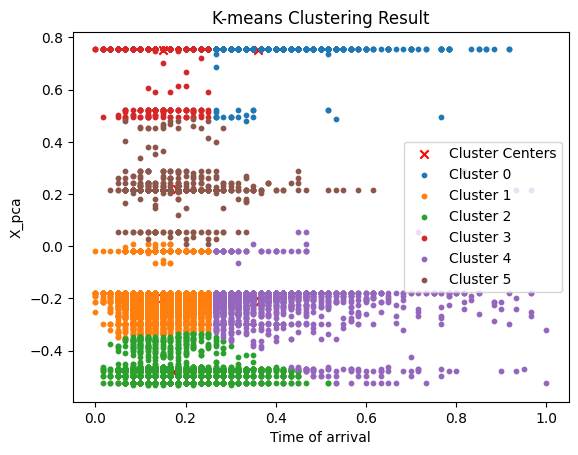

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-means clustering
kmeans = KMeans(n_clusters=6)
kmeans.fit(cluster_df[['도착시각', 'X_pca']])

# Retrieve cluster labels and assign them to the dataframe
cluster_labels = kmeans.labels_
cluster_df['cluster_label'] = cluster_labels

# Retrieve cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot cluster centers as red crosses
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Cluster Centers')

# Plot each cluster's data points
for label in set(cluster_labels):
    cluster_data = cluster_df[cluster_df['cluster_label'] == label]
    plt.scatter(cluster_data['도착시각'], cluster_data['X_pca'], s=10, label=f'Cluster {label}')

# Set x and y axis labels and plot title
plt.xlabel('Time of arrival')
plt.ylabel('X_pca')
plt.title('K-means Clustering Result')

# Display the legend and show the plot
plt.legend()
plt.show()

### -- Elbow method --

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

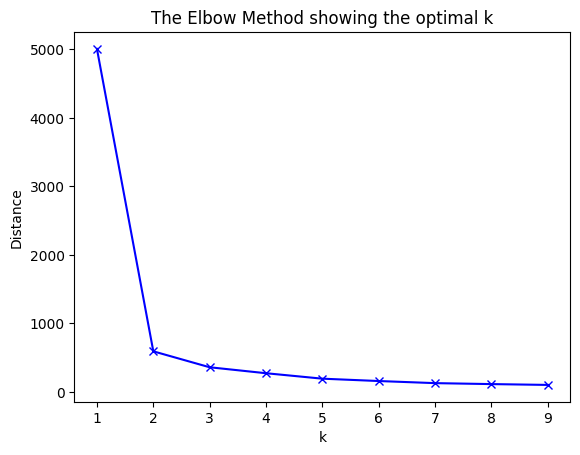

In [15]:
distortions = []  # List to store distortion values

# Define the range of k values to try
K = range(1, 10)

# Iterate over each value of k
for k in K:
    kmeanModel = KMeans(n_clusters=k)  # Create a KMeans model with current k value
    kmeanModel.fit(cluster_df[['도착시각', 'X_pca']])  # Fit the model on the selected features
    distortions.append(kmeanModel.inertia_)  # Append the distortion value to the list

# Plot the distortions
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### -- silhouette score --

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

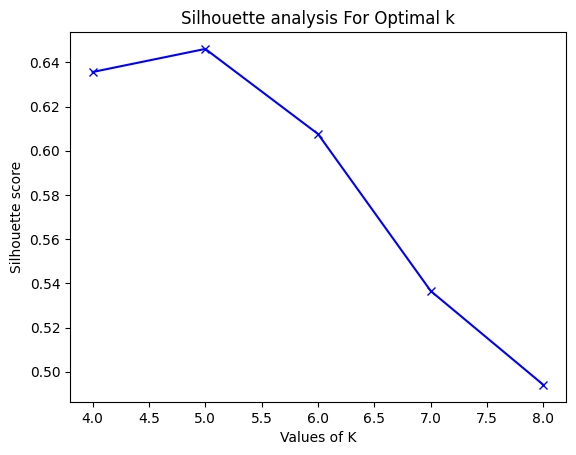

In [274]:
from sklearn.metrics import silhouette_score

# Define the range of cluster numbers to try
range_n_clusters = [4, 5, 6, 7, 8]

# List to store silhouette scores
silhouette_avg = []

# Iterate over each number of clusters
for num_clusters in range_n_clusters:
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(cluster_df[['도착시각', 'X_pca']])  # Fit the model on the selected features
    cluster_labels = kmeans.labels_  # Get the cluster labels
    # Compute the silhouette score for the current number of clusters
    silhouette_avg.append(silhouette_score(cluster_df[['도착시각', 'X_pca']], cluster_labels))

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()


### [Analysis]


---


* It is expressed as the frequency of labels of clustering according to each region of Seongnam-si.
* In most dongs in Seongnam-si, the values corresponding to the first cluster appear to be distributed in the majority. Therefore, most areas in Seongnam City are predicted to be able to get help quickly in emergencies.

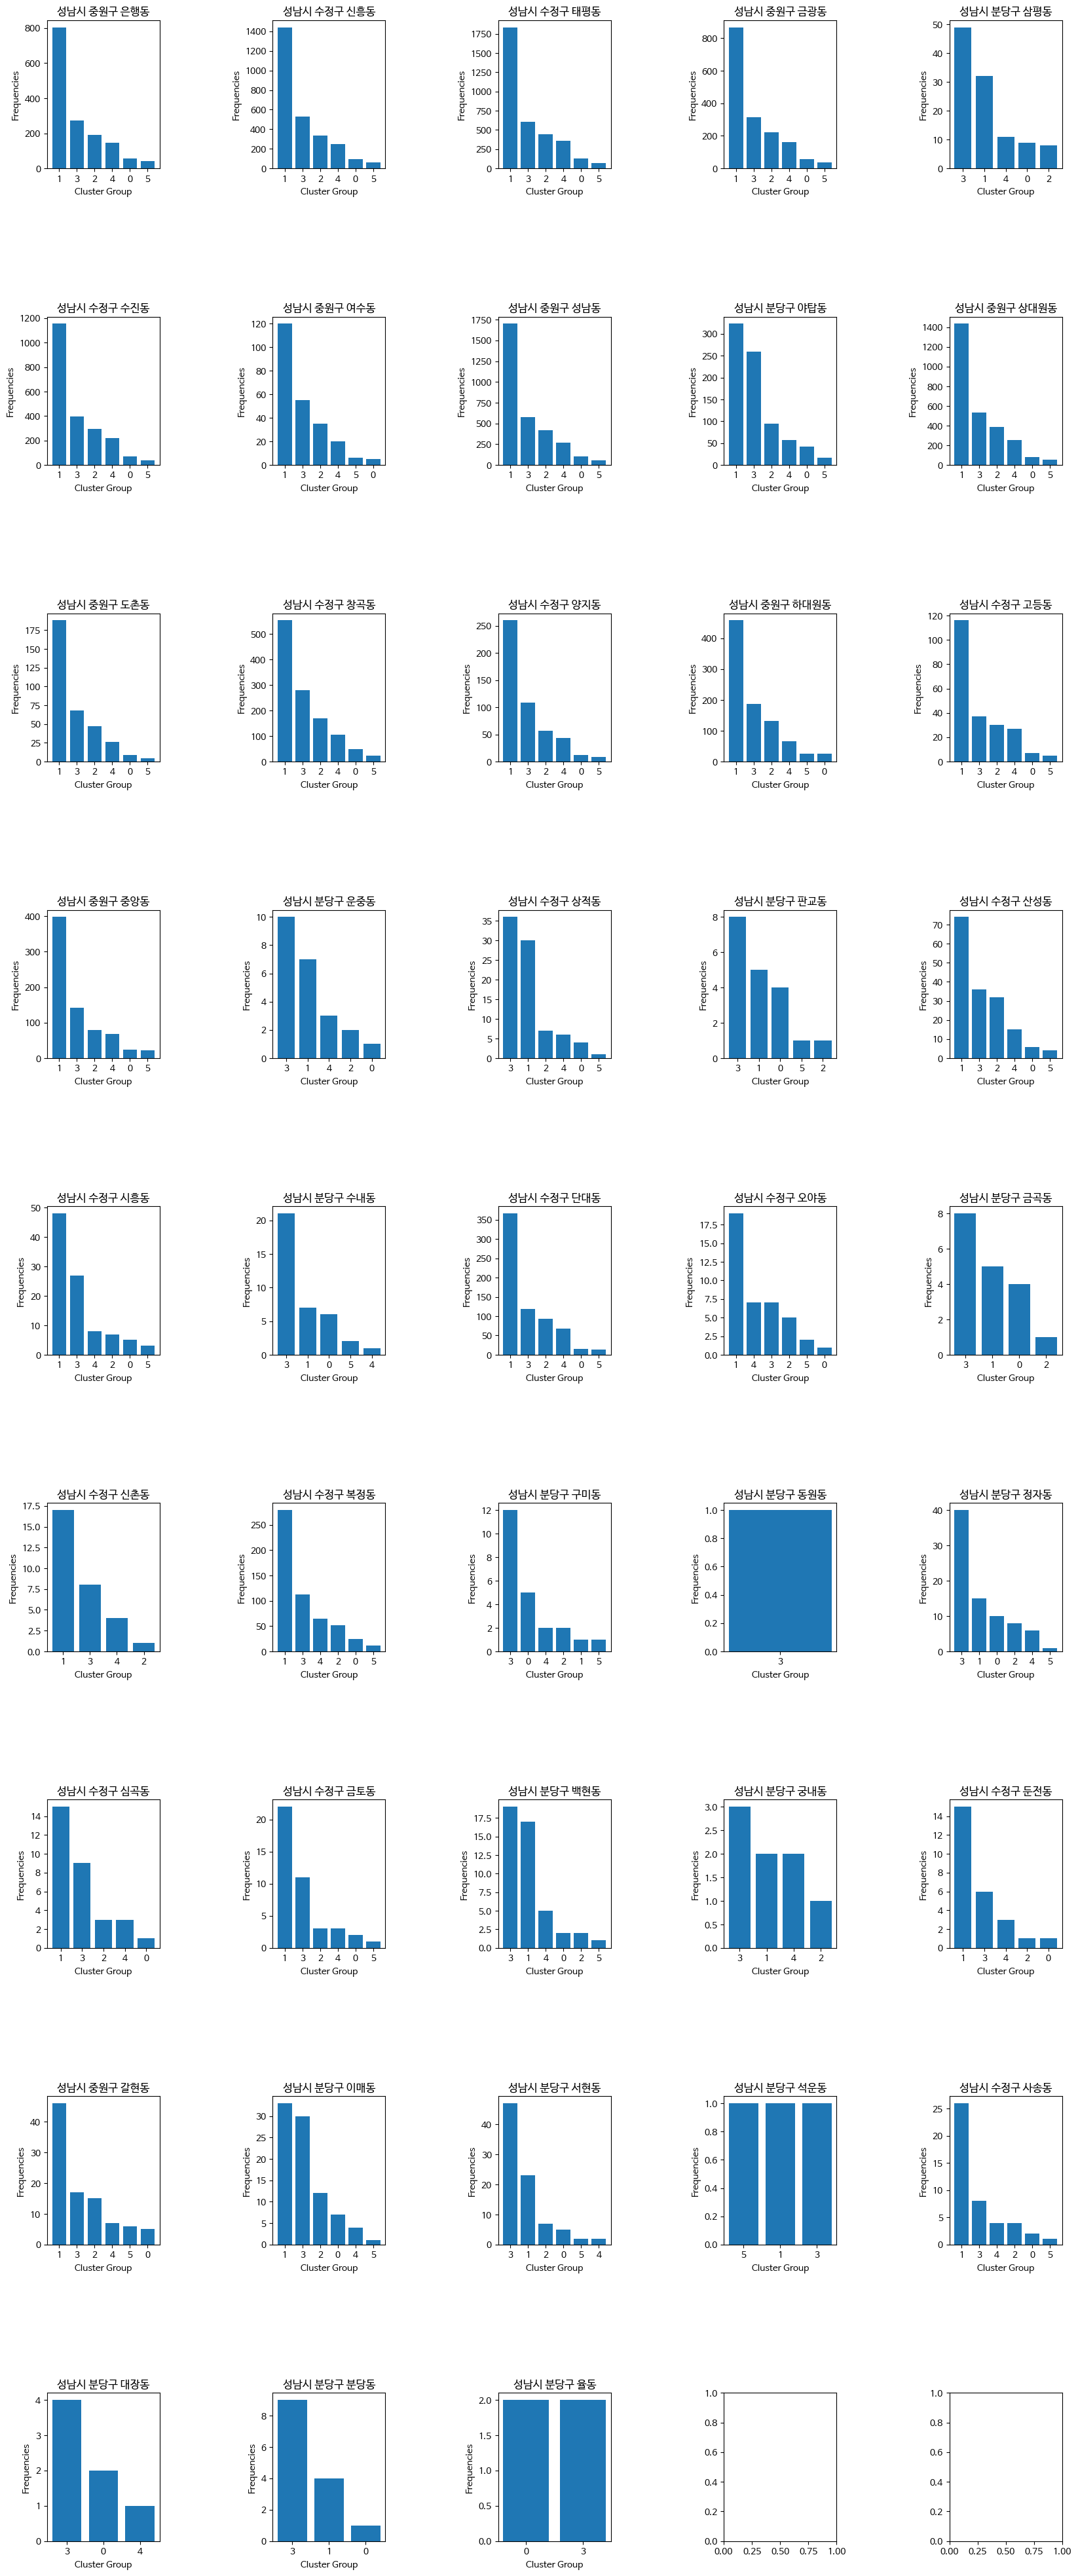

In [30]:
from matplotlib import rcParams

# Resolve broken Korean features
# Reference: https://teddylee777.github.io/colab/colab-korean/
plt.rc('font', family='NanumBarunGothic')

# Assign cluster labels to the 'Group' column in the DataFrame
df['Group'] = cluster_df['cluster_label'].values 
# Get unique categories in the '긴급구조지역' column
categories = df['긴급구조지역'].unique() 

# Set the font style for plotting
plt.rc('font', family='NanumBarunGothic')  
# Create subplots based on the number of categories
fig, axes = plt.subplots((len(categories)) // 5 + 1, 5, figsize=(20, 50), squeeze=False)  

for idx, label in enumerate(categories):
    # Filter the DataFrame for the current category
    label_df = df[df['긴급구조지역'] == label]  
    # Count the frequencies of cluster groups within the category
    label_counts = label_df['Group'].value_counts()  
    # Get the cluster group labels
    labels = label_counts.index.tolist()  
    # Get the corresponding frequencies of cluster groups
    frequencies = label_counts.values.tolist()  
  
    # Get the current subplot
    ax = axes[idx // 5, idx % 5]  
    # Plot the frequencies as a bar chart
    ax.bar(range(len(labels)), frequencies)  
    # Set the x-axis ticks
    ax.set_xticks(range(len(labels))) 
    # Set the labels for x-axis ticks
    ax.set_xticklabels(labels)  
    # Set the x-axis label
    ax.set_xlabel('Cluster Group')
    # Set the y-axis label  
    ax.set_ylabel('Frequencies')  
    # Set the subplot title as the current category
    ax.set_title(f'{label}')  

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=1, hspace=1)  

# Display the plot
plt.show()  